## This is a example of how you will be doing projects in python.
### Use markdown cells -OR- comments in cells to place AT LEAST the question number you are working on. 

3.	Import the required packages

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

4. Using the pandas `read_csv()` method, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.

In [5]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv')

In [6]:
gdp_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2023,1992.424394,NaN
1,Afghanistan,2022,1981.710168,NaN
2,Afghanistan,2021,2144.166570,NaN
3,Afghanistan,2020,2769.685745,NaN
4,Afghanistan,2019,2927.245144,NaN


In [7]:
gdp_df.tail()

,Country or Area,Year,Value,Value Footnotes
8214,Zimbabwe,1994,3965.730986,NaN
8215,Zimbabwe,1993,3634.750494,NaN
8216,Zimbabwe,1992,3649.891947,NaN
8217,Zimbabwe,1991,4126.405247,NaN
8218,Zimbabwe,1990,4013.299059,NaN


5. How many rows and columns are in `gdp_df`? What are the data types of each column?
   There are 8219 rows and 4 columns

In [9]:
print(gdp_df.shape)

(8219, 4)


6. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [11]:
del gdp_df['Value Footnotes']


In [12]:
gdp_df_clean=gdp_df.rename(columns={'Country or Area':'Country','Year':'Year','Value':'GDP_Per_Capita'})

In [13]:
gdp_df_clean.head()


,Country,Year,GDP_Per_Capita
0,Afghanistan,2023,1992.424394
1,Afghanistan,2022,1981.710168
2,Afghanistan,2021,2144.166570
3,Afghanistan,2020,2769.685745
4,Afghanistan,2019,2927.245144


7. How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice? 

In [15]:
num_yrs=gdp_df.nunique(axis=0)
print(num_yrs)

Country or Area     247
Year                 34
Value              8174
dtype: int64


8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?


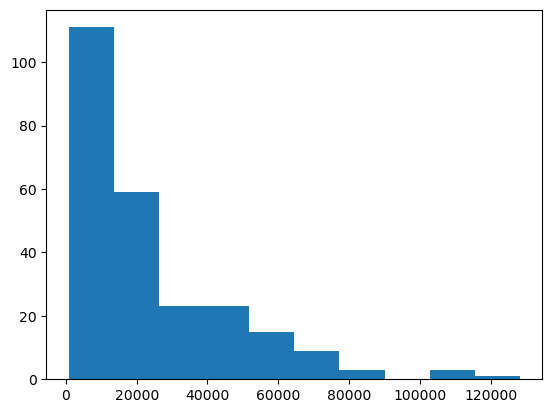

In [32]:
gdp_df_clean_2020=gdp_df_clean.query('Year==2020')
plt.hist(gdp_df_clean_2020['GDP_Per_Capita'])
plt.show()

<Axes: xlabel='GDP_Per_Capita', ylabel='Density'>

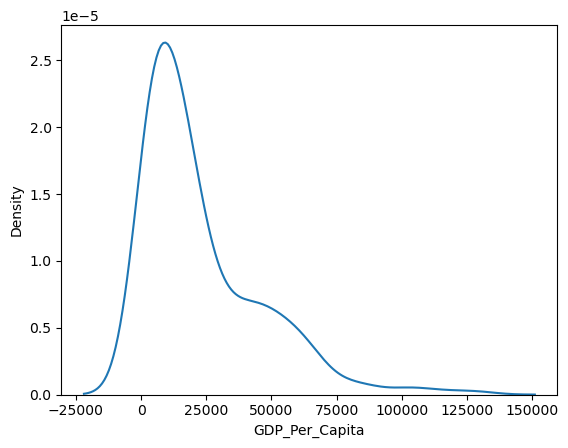

In [34]:
sns.kdeplot(gdp_df_clean_2020['GDP_Per_Capita'])

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

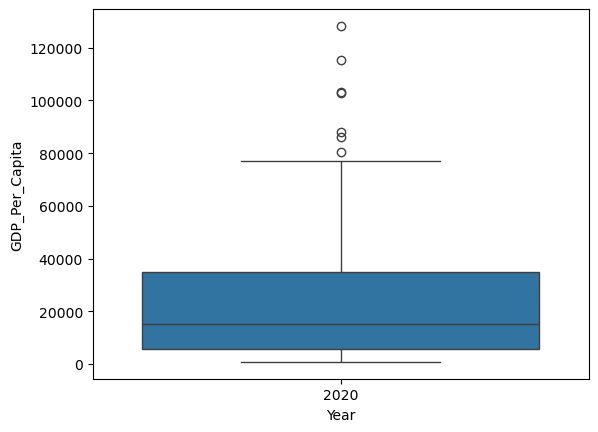

In [36]:
sns.boxplot(x=gdp_df_clean_2020['Year'],y=gdp_df_clean_2020['GDP_Per_Capita'])

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

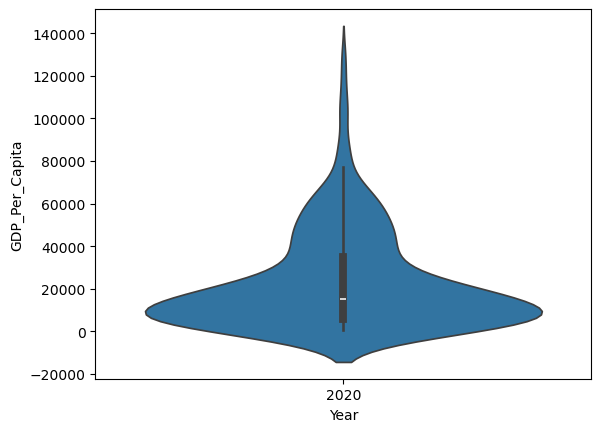

In [38]:
sns.violinplot(x=gdp_df_clean_2020['Year'],y=gdp_df_clean_2020['GDP_Per_Capita'])

All of the plots demonstrate that the gdp data is skewed heavily toward the lower end of the gdp scale.  The box plot shows the discrete outliers (there appears to be seven).  The density plot is the best to use when considering percentages because the area of the entire plot is 1.  The violin plot illustrates how heavily the data skews toward the lower values.  The histogram puts the data into countable buckets, which are easy to interpret.  

9. What was the median GDP per capita value in 2020?

In [49]:
median_gdp_per_capita_2020=gdp_df_clean_2020['GDP_Per_Capita'].median()
print(median_gdp_per_capita_2020)

15309.23598817024


10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:
	* A boxplot
	* A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
	* A scatterplot
	* A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)  
Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.


In [58]:
decades=[1990,2000,2010,2020]
gdp_decades=gdp_df_clean[gdp_df_clean['Year'].isin(decades)]
gdp_decades.head(10)


,Country,Year,GDP_Per_Capita
3,Afghanistan,2020,2769.685745
13,Afghanistan,2010,2848.586061
23,Afghanistan,2000,1617.826475
27,Africa Eastern and Southern,2020,3861.111238
37,Africa Eastern and Southern,2010,3863.836012
47,Africa Eastern and Southern,2000,3176.568655
57,Africa Eastern and Southern,1990,3386.854480
61,Africa Western and Central,2020,4622.731427
71,Africa Western and Central,2010,4343.405839
81,Africa Western and Central,2000,3139.324872


<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

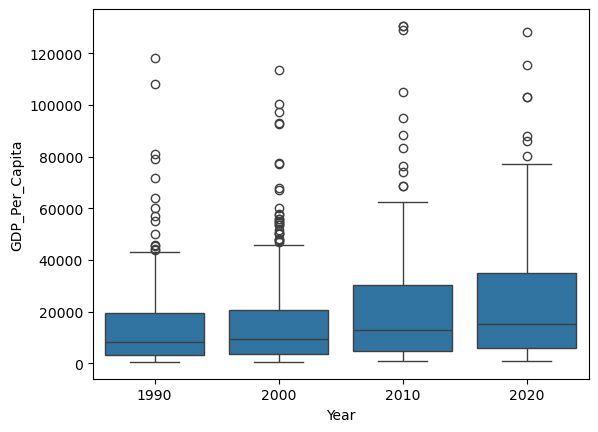

In [60]:
sns.boxplot(x=gdp_decades['Year'],y=gdp_decades['GDP_Per_Capita'])

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

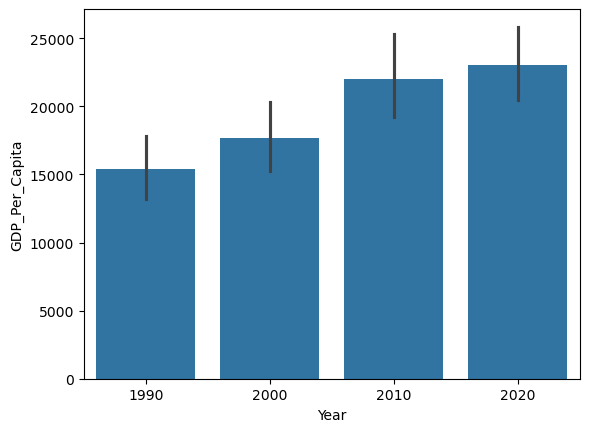

In [64]:
sns.barplot(x=gdp_decades['Year'],y=gdp_decades['GDP_Per_Capita'])

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

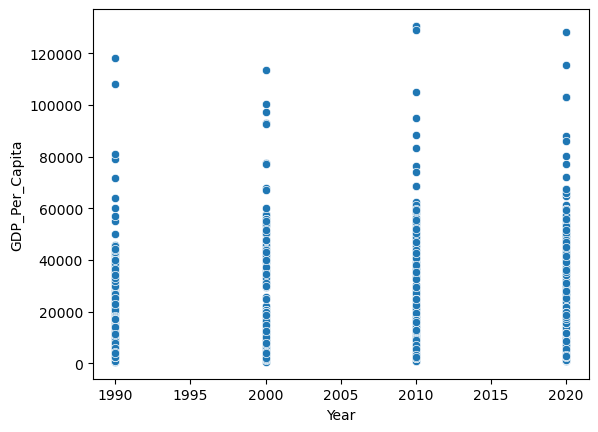

In [66]:
sns.scatterplot(x=gdp_decades['Year'],y=gdp_decades['GDP_Per_Capita'])

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

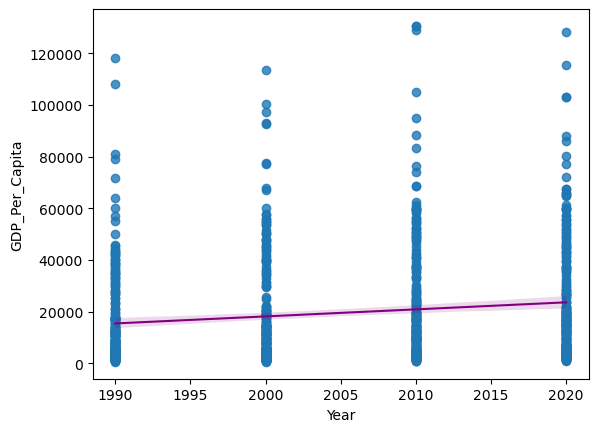

In [70]:
sns.regplot(x=gdp_decades['Year'],y=gdp_decades['GDP_Per_Capita'],line_kws={'color':'purple','linewidth':1.5})

Box and whisker plot - This plot shows that the outliers all lie at the upper end of the data. It also makes the number of outliers the clearest of the four graph types.

Bar graph with error bars - You can easily see the increasing trend of gdp per capita over the decades along with the relative change in the gdp values.

Scatterplot - This plot shows the concentration of data points at the lower end of the gdp scale.  However, the trendline needs to be added in order to determine that the gdp increases over time.


In [95]:
print(gdp_df_clean.info())

gdp_df_over100K=gdp_df_clean.query('GDP_Per_Capita>100000')
gdp_df_over100K.sort_values('Year')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8219 entries, 0 to 8218
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         8219 non-null   object 
 1   Year            8219 non-null   int64  
 2   GDP_Per_Capita  8219 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 192.8+ KB
None


,Country,Year,GDP_Per_Capita
7827,United Arab Emirates,1990,108057.042464
974,Brunei,1990,118163.683198
7826,United Arab Emirates,1991,103098.537132
973,Brunei,1991,118220.683619
7825,United Arab Emirates,1992,101100.487512
...,...,...,...
6116,Qatar,2023,116159.142559
4457,"Macao SAR, China",2023,104961.643485
6511,Singapore,2023,127543.554752
4423,Luxembourg,2023,130373.477942


Both the United Arab Emirates and Brunei had a per capita GDP over $100K in the year 1990.  These were the earliest cases.

12. Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

In [102]:
gdp_df_clean_2020.sort_values('GDP_Per_Capita',ascending=False)

,Country,Year,GDP_Per_Capita
4426,Luxembourg,2020,128256.560341
6514,Singapore,2020,115304.149459
6119,Qatar,2020,103061.913414
3493,Ireland,2020,102989.787335
741,Bermuda,2020,87894.401174
...,...,...,...
5133,Mozambique,2020,1466.124765
6699,Somalia,2020,1396.053436
1734,Dem. Rep. Congo,2020,1277.632863
1302,Central African Republic,2020,1136.570530


Luxembourg had the highest GDP per capita in 2020 with $128256 per person.

In [ ]:

sns.lineplot(x=gdp_decades['Year'],y=gdp_decades['GDP_Per_Capita'])